In [2]:
import roboticstoolbox as rtb

puma = rtb.models.DH.Puma560()

In [3]:
print(puma)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌─────┬────────┬────────┬────────┬─────────┬────────┐
│ θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├─────┼────────┼────────┼────────┼─────────┼────────┤
│  q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
│  q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
│  q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
│  q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
│  q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│  q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└─────┴────────┴────────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬──────┬───────┬─────┬──────┬─────┐
│ name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├──────┼─────┼──────┼───────┼─────┼──────┼─────┤
│   qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│   qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│   qn │  0° │  45° │  180° │  0° │  45° │  0° │
│   qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
└──

In [6]:
Fk = puma.fkine(puma.qz)

print(Fk)

   1         0         0         0.4521    
   0         1         0        -0.15      
   0         0         1         1.104     
   0         0         0         1         



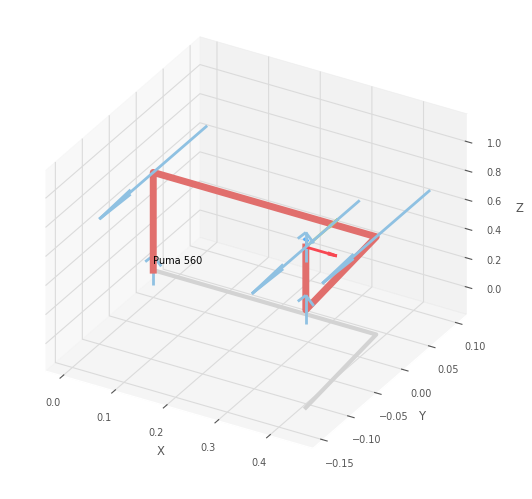

RuntimeError: cannot use teach panel under Jupyter

In [5]:
puma.teach(puma.qz)

In [8]:
from spatialmath import SE3

Tep = SE3.Trans(0.6, -0.3, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol = puma.ik_LM(Tep)         # solve IK
print(sol)

# (array([ 0.20592815,  0.86609481, -0.79473206, -1.68254794,  0.74872915,
#         2.21764746, -0.10255606]), 1, 114, 7, 2.890164057230228e-07)

q_pickup = sol[0]

print(puma.fkine(q_pickup))    # FK shows that desired end-effector pose was achieved

(array([2.52066302, 0.18567593, 1.57829868, 2.73380231, 1.05299277,
       0.86215015]), 0, 3100, 101, 5.6694460602033995e-05)
   0.6894   -0.07873   0.7201    0.08997   
   0.2068    0.9741   -0.09144   0.1201    
  -0.6943    0.2119    0.6878    0.6886    
   0         0         0         1         



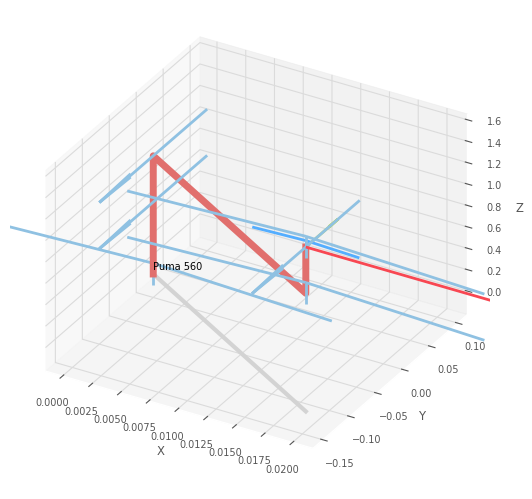

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'Puma 560')

<Figure size 640x480 with 0 Axes>

In [11]:
qt = rtb.jtraj(puma.qr, q_pickup, 50)
puma.plot(qt.q, backend='pyplot', movie='puma.gif')